In [1]:
import pandas as pd
import json

In [6]:
with open('./data/sneaker_info.json') as f:
    sneaker_info = json.load(f)

sneaker_info['Nike Air Pegasus 92 Lite']

{'lowestResellPrice': {'stockX': 333, 'flightClub': 300, 'goat': 300},
 'imageLinks': [],
 '_id': '648507dc21b75900214ad913',
 'shoeName': 'Nike Air Pegasus 92 Olympic (2016)',
 'brand': 'Nike',
 'silhoutte': 'Nike Air Pegasus 92',
 'styleID': '844964-100',
 'make': 'Nike Air Pegasus 92',
 'colorway': 'White/University Red-Midnight Navy',
 'retailPrice': 115,
 'thumbnail': 'https://images.stockx.com/images/Nike-Air-Pegasus-92-Olympic-2016-Product.jpg?fit=fill&bg=FFFFFF&w=700&h=500&fm=webp&auto=compress&trim=color&q=90&dpr=2&updated_at=1607654427',
 'releaseDate': '2016-07-07',
 'description': 'In honor of the 2016 Summer Olympics in Rio de Janeiro, Nike brought back the Olympic-themed Pegasus colorway that originally dropped during the ‘92 Barcelona Games. A suitably patriotic color scheme is applied to the retro runner, highlighted by a white and mesh leather upper with a red leather Swoosh and navy mesh quarter panel.',
 'urlKey': 'air-pegasus-92-olympic-2016',
 'resellLinks': {'stoc

In [19]:
data = []
style_info_columns = ['shoeName', 'brand', 'make', 'colorway', 'retailPrice', 'releaseDate']
df_columns = ['Lasso Sneaker Name', 'StockX Price', 'Flight Club Price', 'GOAT Price', 'Matched Sneaker Name', 'Brand', 'Make', 'Colorway', 'Retail Price', 'Release Date']
for sneaker, info in sneaker_info.items():
    try:
        resell_prices = [info['lowestResellPrice']['stockX'], info['lowestResellPrice']['flightClub'], info['lowestResellPrice']['goat']]
    except:
        resell_prices = ['', '', '']
    style_info = [info[col] for col in style_info_columns]
    row = [sneaker, *resell_prices, *style_info]
    data.append(row)

df = pd.DataFrame(data, columns=df_columns)

In [20]:
df

,Lasso Sneaker Name,StockX Price,Flight Club Price,GOAT Price,Matched Sneaker Name,Brand,Make,Colorway,Retail Price,Release Date
0,Nike Air Pegasus 92 Lite,333,300,300,Nike Air Pegasus 92 Olympic (2016),Nike,Nike Air Pegasus 92,White/University Red-Midnight Navy,115,2016-07-07
1,Nike Tanjun,79,90,90,Nike Tanjun White White-Black (Women's),Nike,Nike Tanjun,White/White-Black,70,
2,Jordan Zoom Zero Gravity,169,89,89,Nike Court Air Zoom Zero Aqua (Women's),Nike,Nike Court Air Zoom Zero,White/Bright Concord-Aquatone-Varsity Red,190,2019-08-26
3,Jordan React Havoc Paris Saint-Germain (PSG),928,120,120,Jordan React Havoc PSG Paris Saint-Germain,Jordan,Jordan React Havoc,White/Black-Infrared 23,130,2019-08-10
4,Nike Tanjun in Midnight Navy/Game Royal/White,,,,Nike Tanjun Midnight Navy,Nike,Nike Tanjun,Midnight Navy/Game Royal/White,65,
5,Nike Air Huarache Premium ‘Varsity Jacket’ in Red,,,,Nike Air Huarache Run Varsity Jacket Red,Nike,Nike Air Huarache Run,University Red/Sail/Blackened Blue,120,2018-06-23
6,Nike Air Zoom Pegasus Lite Total Orange 92,100,62,62,Nike Air Zoom Pegasus 39 Pure Platinum Total O...,Nike,Nike Air Zoom Pegasus 39,Pure Platinum/Total Orange-Mineral Slate-Brigh...,120,2022-04-28
7,Odyssey React 2 Flyknit ‘Black Racer Blue’,41,105,105,Nike Odyssey React 2 Flyknit Black Racer Blue,Nike,Nike Odyssey React 2 Flyknit,Black/Racer Blue/White,120,2020-08-05
8,Eric Koston Air Jordan 1 Low ‘Powder Blue’,98,110,117,Jordan 1 Retro Low OG Black Dark Powder Blue,Jordan,Jordan 1 Retro Low OG,White/Dark Powder Blue/Black,130,2022-07-29
9,JIMMY CHOO Diamond X Strap/F Leather Sneakers,,,,Jimmy Choo Diamond Sneakers White,Jimmy Choo,Jimmy Choo Diamond Sneakers,Diamond/F Cat White,474,


In [23]:
df['Retail Price'].describe()

count     27.000000
mean     135.703704
std       78.202801
min       65.000000
25%       95.000000
50%      120.000000
75%      130.000000
max      474.000000
Name: Retail Price, dtype: float64

In [41]:
price_cols = ['Retail Price', 'StockX Price', 'GOAT Price']
for col in price_cols:
    df[col] = pd.to_numeric(df[col],errors='coerce')
my_dict = df[price_cols].to_dict(orient='list')
for key, val in my_dict.items():
    my_dict[key] = [x for x in val if not pd.isnull(x)]
my_dict

{'Retail Price': [115.0,
  70.0,
  190.0,
  130.0,
  65.0,
  120.0,
  120.0,
  120.0,
  130.0,
  474.0,
  95.0,
  120.0,
  100.0,
  85.0,
  200.0,
  100.0,
  215.0,
  90.0,
  90.0,
  190.0,
  80.0,
  120.0,
  130.0,
  130.0,
  170.0,
  120.0,
  95.0],
 'StockX Price': [333.0,
  79.0,
  169.0,
  928.0,
  100.0,
  41.0,
  98.0,
  592.0,
  202.0,
  113.0,
  122.0,
  189.0,
  85.0,
  141.0,
  150.0,
  321.0,
  134.0,
  275.0,
  107.0,
  319.0,
  57.0,
  87.0],
 'GOAT Price': [300.0,
  90.0,
  89.0,
  120.0,
  62.0,
  105.0,
  117.0,
  97.0,
  193.0,
  124.0,
  123.0,
  162.0,
  80.0,
  120.0,
  131.0,
  262.0,
  95.0,
  194.0,
  87.0,
  330.0,
  59.0,
  76.0]}

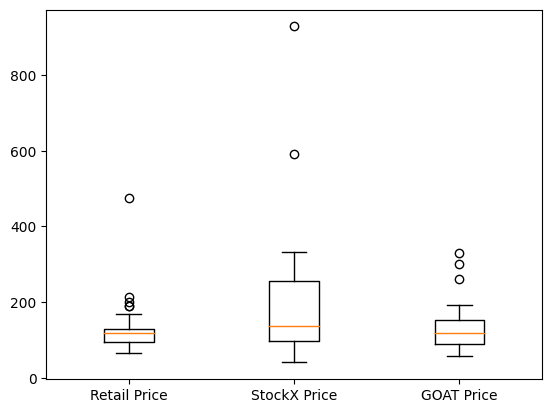

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys());